In [2]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="uZDVJbrpvATDX8hsxE3fLg",
    client_secret="ARxGLgsrtwN5wd7HJepErVnvpGlj0w",
    user_agent=user_agent
)

In [3]:
import pandas as pd
import numpy as np
import re

In [24]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("ipl").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

🏆 Who's taking home the trophy this season? Vote for your team today!
1c4hlwo
i18n-leaderboard
1713171932.0
364
0.99
https://www.reddit.com/r/ipl/comments/1c4hlwo/whos_taking_home_the_trophy_this_season_vote_for/
0


In [25]:
headlines = set()
for submission in reddit.subreddit("ipl").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

875


In [26]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Only Major contribution of RCB in IPL 2024
1,He is saying it himself
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024
3,Public Perception of each IPL team this season ✅
4,"Dayal: Hold my beer, Kohli! I'm coming for the..."


In [27]:
# df = df.iloc[:, 1:]
bitcoin_df.head()

,0
0,Only Major contribution of RCB in IPL 2024
1,He is saying it himself
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024
3,Public Perception of each IPL team this season ✅
4,"Dayal: Hold my beer, Kohli! I'm coming for the..."


In [28]:
bitcoin_df.columns

RangeIndex(start=0, stop=1, step=1)

In [29]:

bitcoin_df.columns = ['Titles']

In [30]:
bitcoin_df.head()

,Titles
0,Only Major contribution of RCB in IPL 2024
1,He is saying it himself
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024
3,Public Perception of each IPL team this season ✅
4,"Dayal: Hold my beer, Kohli! I'm coming for the..."


In [31]:
bitcoin_df.Titles.duplicated().sum()

0

In [32]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Only Major contribution of RCB in IPL 2024
1,He is saying it himself
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024
3,Public Perception of each IPL team this season ✅
4,"Dayal Hold my beer, Kohli! I'm coming for the ..."


In [33]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Only Major contribution of RCB in IPL 2024
1,He is saying it himself
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024
3,Public Perception of each IPL team this season
4,"Dayal Hold my beer, Kohli! I'm coming for the ..."


In [34]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [35]:

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Only Major contribution of RCB in IPL 2024,0.750000,0.03125
1,He is saying it himself,0.000000,0.00000
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024,0.000000,0.00000
3,Public Perception of each IPL team this season,0.066667,0.00000
4,"Dayal Hold my beer, Kohli! I'm coming for the ...",0.000000,0.00000


In [36]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,Only Major contribution of RCB in IPL 2024,0.750000,0.031250,Positive
1,He is saying it himself,0.000000,0.000000,Neutral
2,VIRAT KOHLI FLICK OF THE WRISTS IN IPL 2024,0.000000,0.000000,Neutral
3,Public Perception of each IPL team this season,0.066667,0.000000,Neutral
4,"Dayal Hold my beer, Kohli! I'm coming for the ...",0.000000,0.000000,Neutral
5,400 SR today. This youngster has great chances...,0.750000,0.800000,Positive
6,Points table after RR vs MI,0.000000,0.000000,Neutral
7,Q Why Rachin is failing in CSK. Ans B...,0.875000,0.150000,Positive
8,Madness from the SUNRISERS,0.000000,0.000000,Neutral
9,HAIL SHASHANK HAIL SHASHANK,0.000000,0.000000,Neutral


In [37]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
hydroelectric_df["Insight"] = hydroelectric_df["Polarity"].apply(getInsight)

hydroelectric_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,The start of great hydro power,0.750000,0.800000,Positive
1,Hydro is a scam,0.000000,0.000000,Neutral
2,How to find the torque of a hydropower water w...,0.000000,0.000000,Neutral
3,Electrical/power engineering online contest wo...,0.100000,0.300000,Positive
4,Info on negotiating power purchasing agreement...,0.400000,-0.250000,Negative
5,"""I'm going to ban you from building more hydro...",0.551515,0.045455,Positive
6,Hi guys! Lately I've just filmed a small docum...,0.491667,0.091667,Positive
7,Turbulent - Eco-friendly hydropower for everyo...,0.300000,0.000000,Neutral
8,China turns on world's second-biggest hydropow...,0.000000,0.000000,Neutral
9,Producing electricity from a man made river,0.000000,0.000000,Neutral



Data Visualization

In [20]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

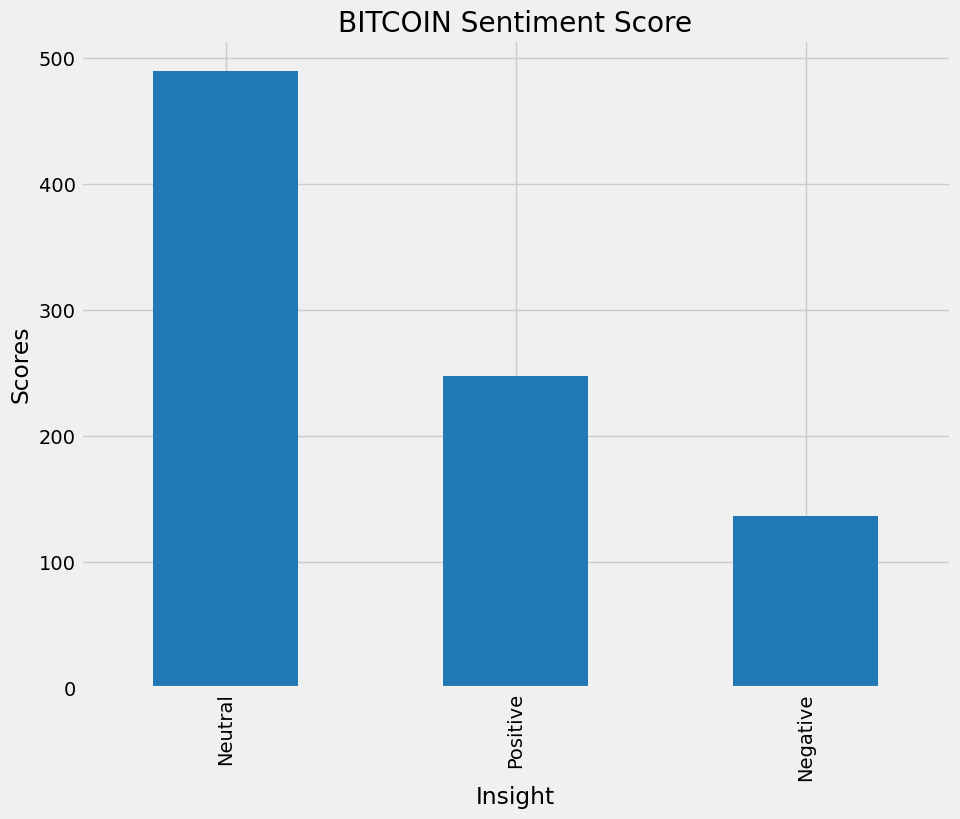

In [38]:
#Plot the values count of sentiment
plt.title("BITCOIN Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()


Wordcloud

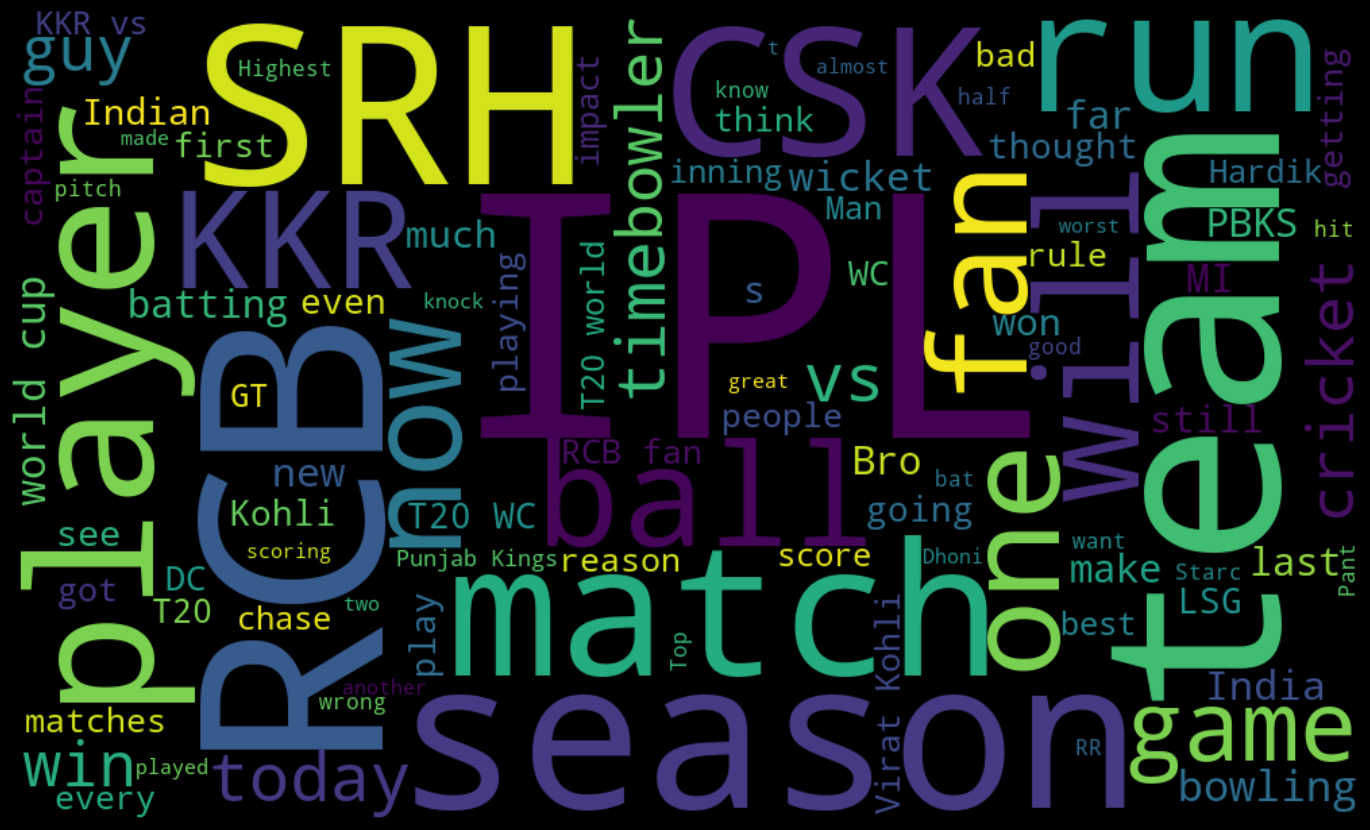

In [39]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");